# I-94 Traffic Indicators

The goal of the project is to analyze a dataset about the westbound traffic on the I-94 Interstate highway, roughly midway between Minneapolis and St Paul, MN, and determine indicators of heavy traffic.

Attribute Information:

- holiday: Categorical US National holidays plus regional holiday, Minnesota State Fair 
- temp: Numeric Average temp in kelvin 
- rain_1h: Numeric Amount in mm of rain that occurred in the hour 
- snow_1h: Numeric Amount in mm of snow that occurred in the hour 
- clouds_all: Numeric Percentage of cloud cover 
- weather_main: Categorical Short textual description of the current weather 
- weather_description: Categorical Longer textual description of the current weather 
- date_time: DateTime Hour of the data collected in local CST time 
- traffic_volume: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

The dataset was downloaded from UCI Machine Learning Repository:

https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

In [28]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None

In [5]:
# enable graphs in Jupyter
%matplotlib inline

In [6]:
# Read the dataset
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [7]:
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


The variables mainly come from 2 categories - time (month, weekday, hour etc) and weather conditions, we will examine both.

<AxesSubplot:ylabel='Frequency'>

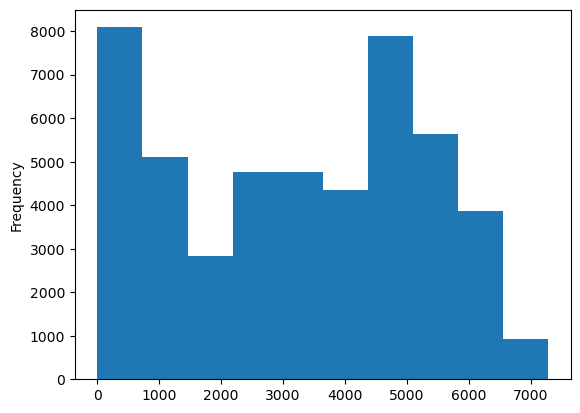

In [8]:
# Plot a distribution of traffic volumes
traffic['traffic_volume'].plot.hist()

In [9]:
# Statistics of traffic volumes
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Day vs Night

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

One possibility is nighttime and daytime influence traffic volume, and to prove this we compare daytime with nighttime data.

We divide the dataset into two parts:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [10]:
# Transforming date time column to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [11]:
date_time_h = traffic['date_time'].dt.hour # extracting the hour from date_time
day = traffic[date_time_h.between(7, 19, inclusive='left')] # isolating the daytime (7:00 a.m. to 6:59 p.m.)
night = traffic[~date_time_h.between(7, 19, inclusive='left')] # isolating the nighttime (7 p.m. to 6:59 a.m.)

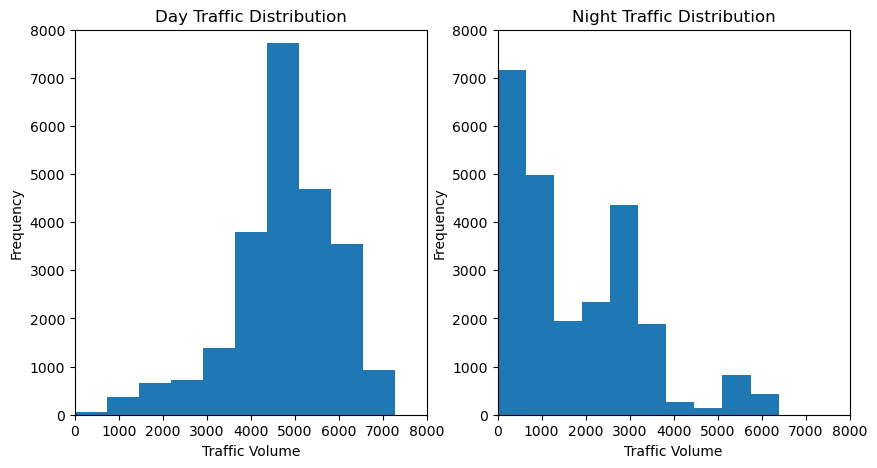

In [12]:
plt.figure(figsize = (10,5)) # Set figure for plots

plt.subplot(1, 2, 1) # Plot daytime traffic
plt.hist(day['traffic_volume'])
plt.title('Day Traffic Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0, 8000])
plt.ylim([0, 8000])

plt.subplot(1, 2, 2) # Plot nighttime traffic
plt.hist(night['traffic_volume'])
plt.title('Night Traffic Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0, 8000])
plt.ylim([0, 8000])

plt.show()

In [13]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Distribution of traffic at night is positively skewed, with low mean volumes. Since our goal is to examine indicators of heavy traffic, we will continue to explore only the day time traffic data.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
- Month
- Day of the week
- Time of day

In [15]:
day['month'] = day['date_time'].dt.month # Add month from date time as a new column
by_month = day.groupby('month').mean() # Grouping data by month and calculating the mean for each month
by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


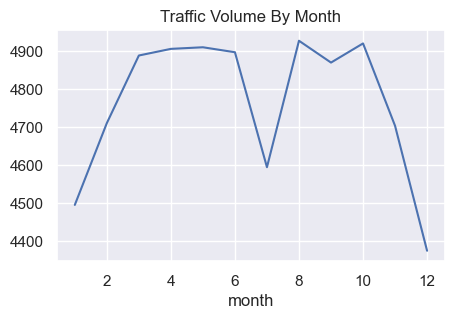

In [46]:
# Plot monthly traffic volumes
plt.figure(figsize=(5,3))
by_month['traffic_volume'].plot.line()
plt.title('Traffic Volume By Month')
plt.show()

Maximal volumes of traffic are observed in March-June and August-October.

In [17]:
# Grouping by day of the week and calculating the mean
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek # 0 is Monday, 6 is Sunday

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month
dayofweek,,,,,,
0,282.262755,2.923823,0.000017,57.508053,4893.551286,6.401243
1,282.301770,0.129172,0.000194,52.333234,5189.004782,6.458757
2,282.198316,0.068099,0.001091,53.662119,5284.454282,6.619158
3,282.279115,0.172436,0.000148,53.993191,5311.303730,6.501184
4,282.181216,0.092828,0.000225,51.412200,5291.600829,6.575067
5,282.300646,0.107596,0.000094,50.446376,3927.249558,6.498821
6,282.280340,0.133170,0.000000,52.288699,3436.541789,6.604179


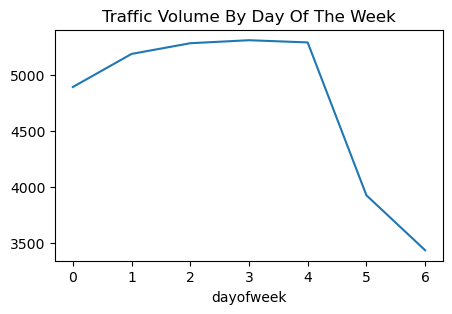

In [18]:
# Plot the daily traffic volumes
plt.figure(figsize=(5,3))
by_dayofweek['traffic_volume'].plot.line()
plt.title('Traffic Volume By Day Of The Week')
plt.show()

The traffic is heaviest in business days.

The traffic volumes are much lower on weekends, so to look at hourly data we will split the dataset based on the day type: business day or weekend.

In [19]:
# Grouping by hour and splitting the dataset
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday

by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

In [20]:
by_hour_business['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [21]:
by_hour_weekend['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

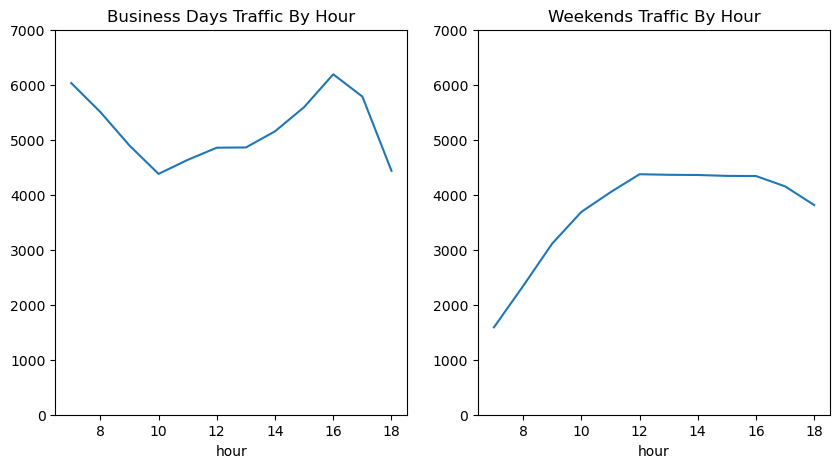

In [22]:
plt.figure(figsize = (10,5)) # Set figure for plots

plt.subplot(1, 2, 1) # Plot business days traffic
by_hour_business['traffic_volume'].plot.line()
plt.title('Business Days Traffic By Hour')
plt.ylim([0, 7000])

plt.subplot(1, 2, 2) # Plot weekends traffic
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekends Traffic By Hour')
plt.ylim([0, 7000])

plt.show()

On business days rush hour time is usually when people commute to work and back home - around 7 a.m. and around 4 p.m., while on weekends the traffic is at its peak from 12 p.m to 4 p.m.

Summing up on time indicators:
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 a.m. and 4 p.m.

## Weather Indicators

Weather is another possible indicator of heavy traffic. We begin by inspecting the correlation coefficients of numeric weather columns and traffic volume.

In [31]:
# Selecting all numeric weather columns and selecting correlation coefficients with traffic volume column
weather_num = day.copy()[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']]
weather_num.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

There seems to be be only a slight correlation between temperature and traffic. We will plot it to show it does not look a reliabile indicator.

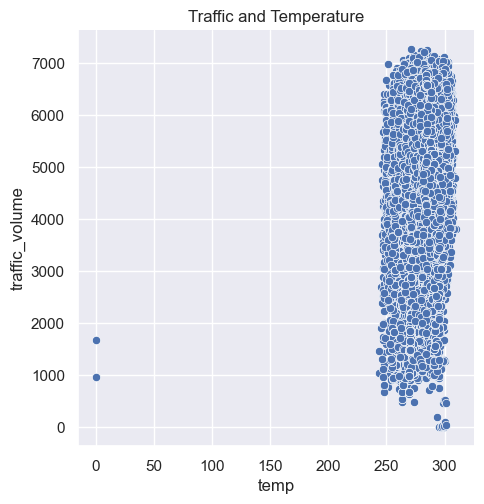

In [47]:
sns.set_theme()
sns.relplot(data=day[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']],
            x='temp', y='traffic_volume')
plt.title('Traffic and Temperature')
plt.show()

Since the temperature of 0 K (-273 C) is not possible, we will remove these outliers and look again.

In [33]:
weather_num['temp'].value_counts().sort_index(ascending=True)

0.00      2
243.39    1
243.62    1
245.70    2
246.15    2
         ..
308.87    1
308.95    1
309.08    1
309.29    1
310.07    1
Name: temp, Length: 5111, dtype: int64

In [37]:
# Removing zero temp rows
weather_num_clean = weather_num[weather_num['temp']!=0]

In [39]:
weather_num_clean.corr()['traffic_volume']

temp              0.125536
rain_1h           0.003696
snow_1h           0.001259
clouds_all       -0.033295
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

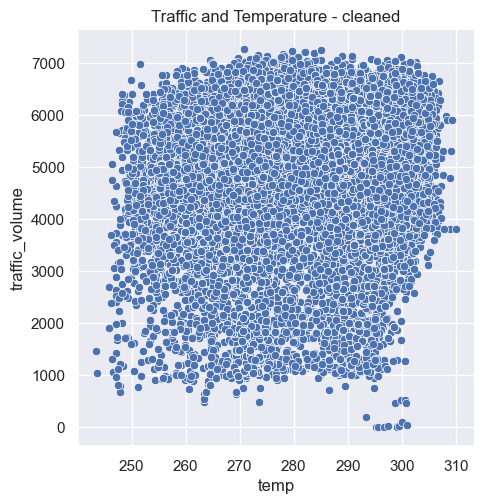

In [48]:
sns.set_theme()
sns.relplot(data=weather_num_clean[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']],
            x='temp', y='traffic_volume')
plt.title('Traffic and Temperature - cleaned')
plt.show()

No reliable trend is to be noticed.

Next we will look into categorical weather variables.

In [40]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

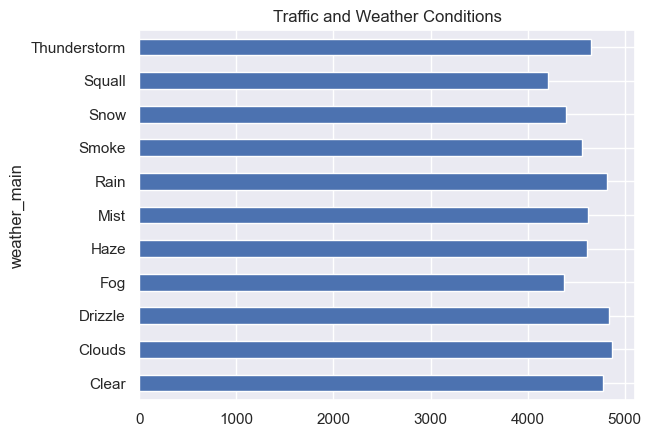

In [49]:
by_weather_main['traffic_volume'].plot.barh()
plt.title('Traffic and Weather Conditions')
plt.show()

No strong connection between main weather type and traffic is evident here. We will look into detailed weather conditions.

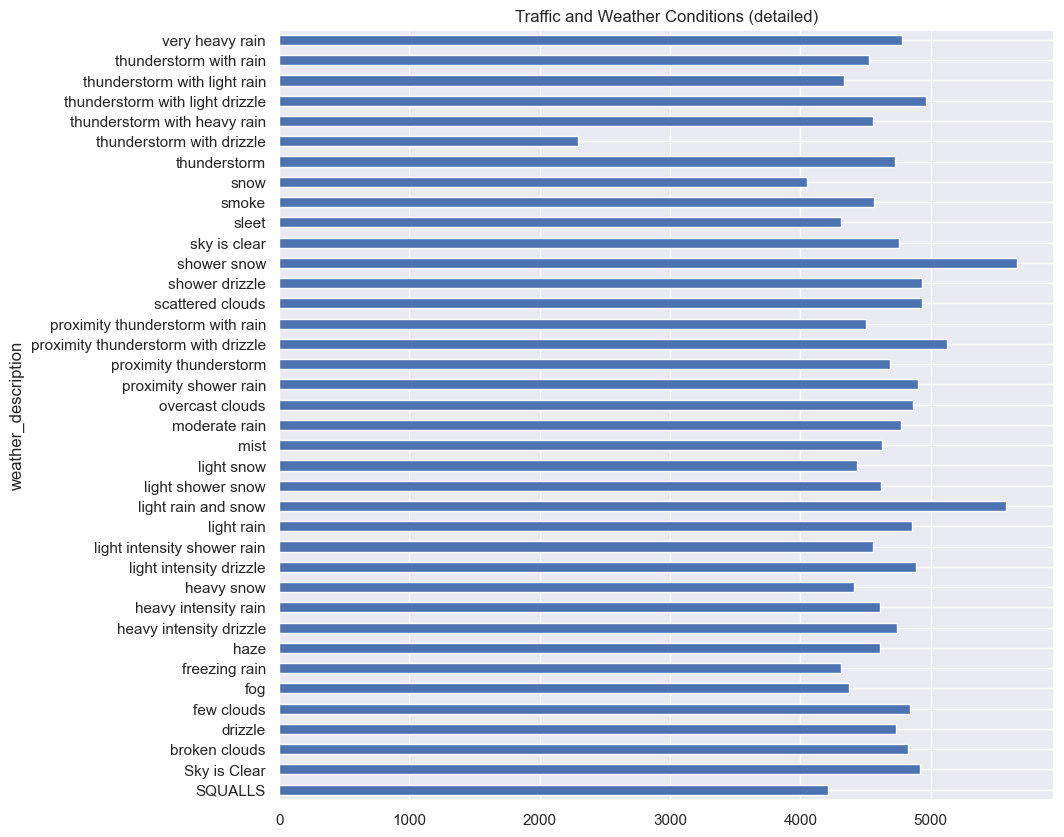

In [50]:
by_weather_description['traffic_volume'].plot.barh(figsize=[10,10]) # Enlarge figure size
plt.title('Traffic and Weather Conditions (detailed)')
plt.show()

Traffic volumes over 5000 cars on average happen when there is one of three weather conditions - shower snow, light rain and snow, and proximity thunderstorm with drizzle.

# Conclusion

The goal of this project was to analyze data about the westbound traffic on the I-94 Interstate highway and determine indicators of heavy traffic.

We segregated the data into day (7 a.m. to 7 p.m.) and night time subsets, and focused on data which showed high volumes of traffic, which is day time.

Having analyzed time indicators, we can conclude:
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 a.m. and 4 p.m.

By examining weather variables, we can assume that the following weather conditions may be indicators of heavy traffic:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle.